<a href="https://colab.research.google.com/github/dimmalaashok/Machine-Learning/blob/first/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data=pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# ***Exploring the data***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
num_att=[att for att in data.columns if data[att].dtype!='O']
cat_att=[att for att in data.columns if data[att].dtype=='O']
num_att,cat_att

(['step',
  'amount',
  'oldbalanceOrg',
  'newbalanceOrig',
  'oldbalanceDest',
  'newbalanceDest',
  'isFraud',
  'isFlaggedFraud'],
 ['type', 'nameOrig', 'nameDest'])

**Different values in categorical data**

In [ ]:
for att in cat_att:
    print(data[att].value_counts())
    print("-------------------------------##################-----------------------")

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
-------------------------------##################-----------------------
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
-------------------------------##################-----------------------
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64
-------------------------------##################-----------------------


In [ ]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

**Stats of the Data**

In [ ]:
data.describe(include="O")

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# ***Data visualization***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

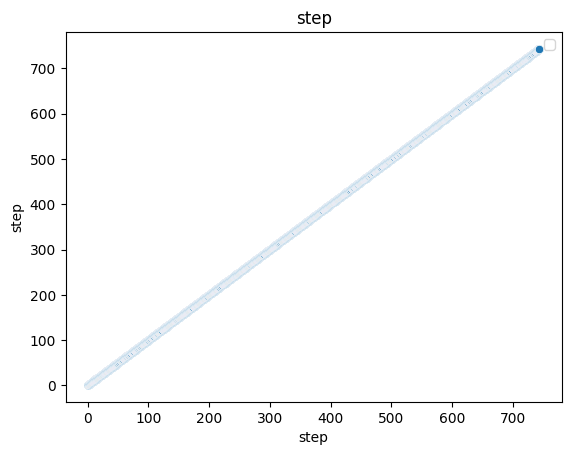

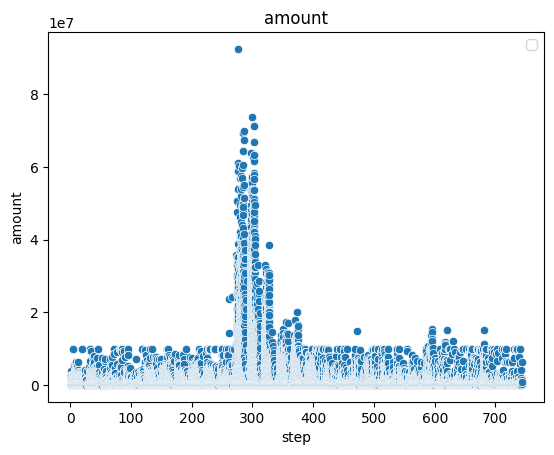

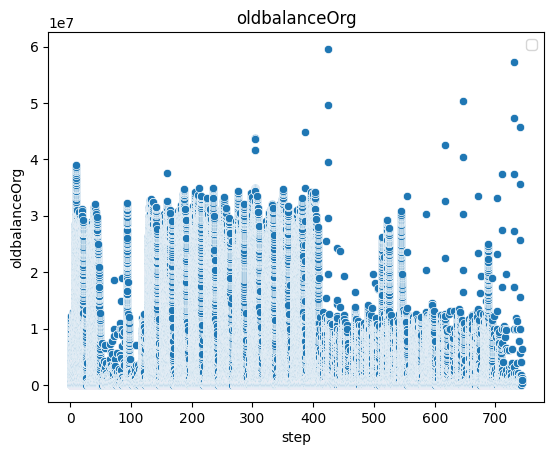

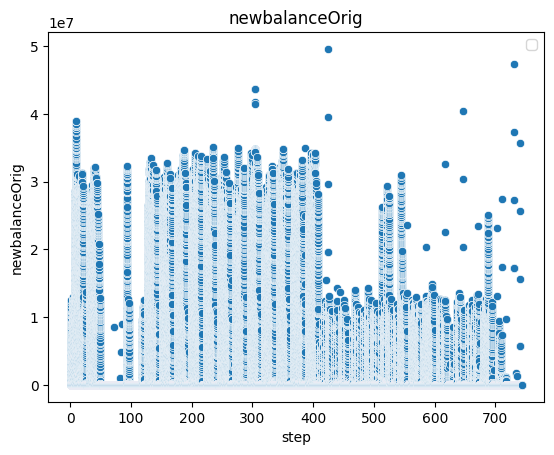

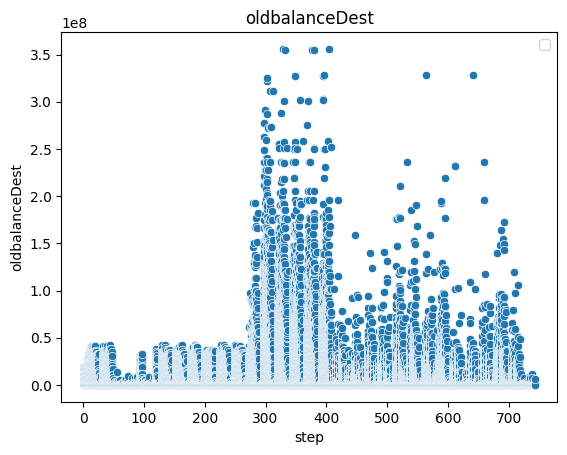

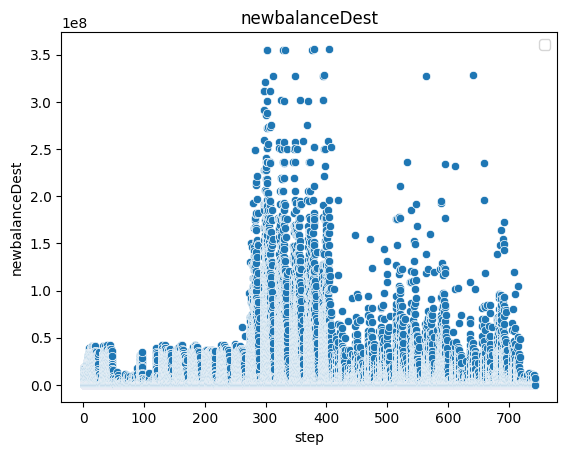

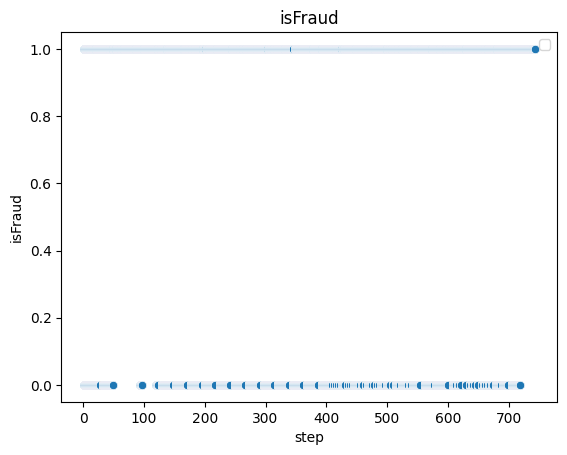

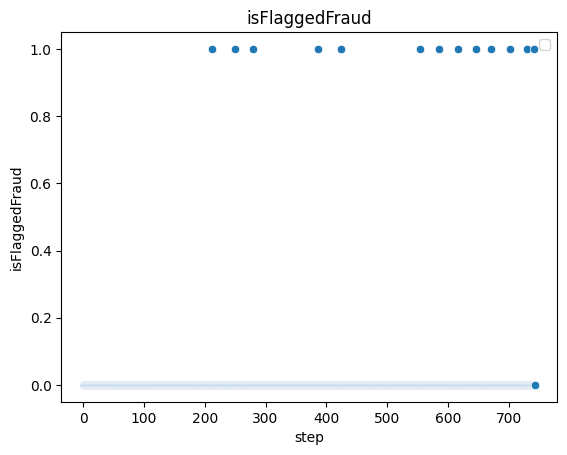

In [ ]:
for att in num_att:
  sns.scatterplot(data=data,x="step",y=att)
  plt.title(att)
  plt.xlabel("step")
  plt.ylabel(att)
  plt.legend()
  plt.show()

<ipython-input-19-f8adf47c4819>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[att])


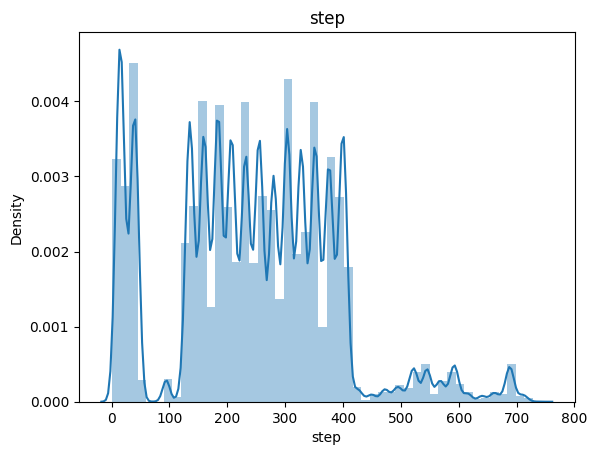

<ipython-input-19-f8adf47c4819>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[att])


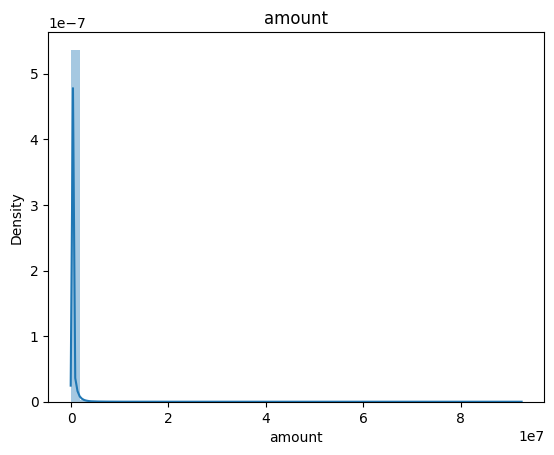

<ipython-input-19-f8adf47c4819>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[att])


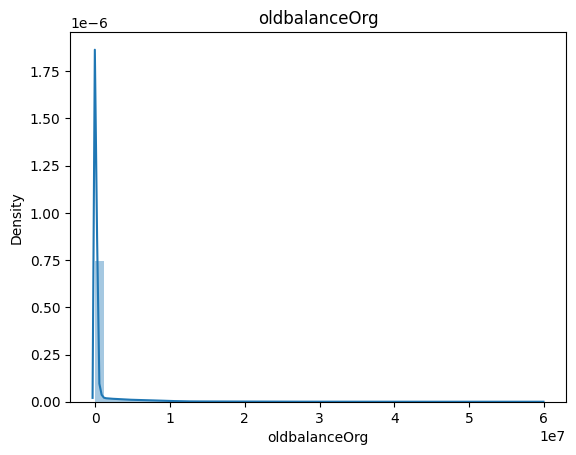

<ipython-input-19-f8adf47c4819>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[att])


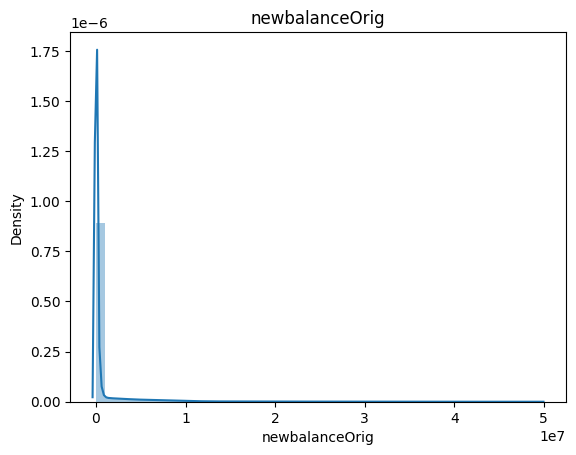

<ipython-input-19-f8adf47c4819>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[att])


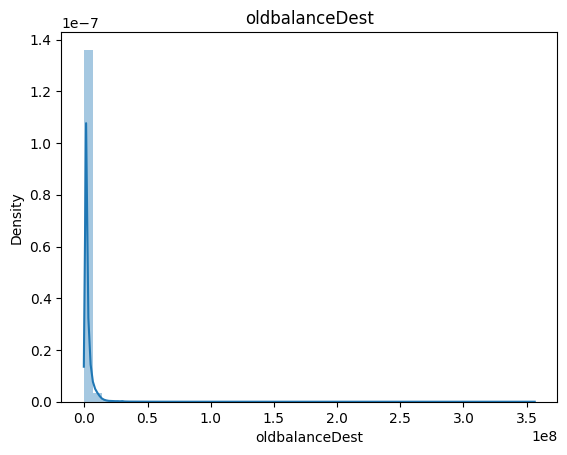

<ipython-input-19-f8adf47c4819>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[att])


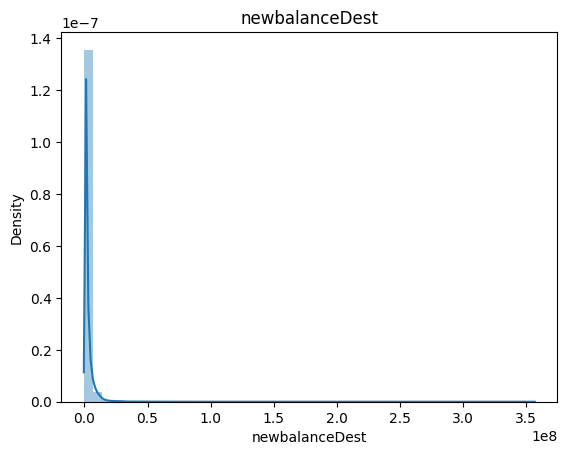

<ipython-input-19-f8adf47c4819>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[att])


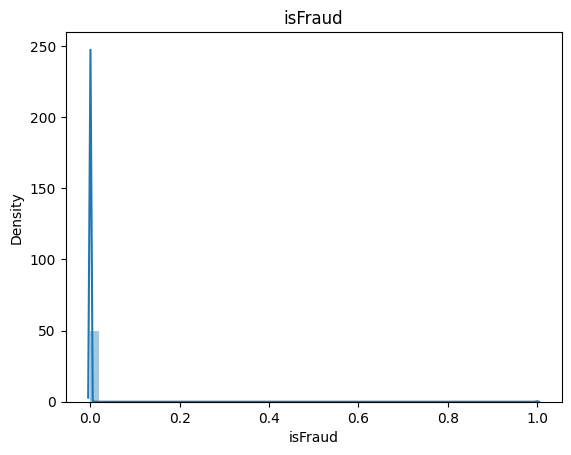

<ipython-input-19-f8adf47c4819>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[att])


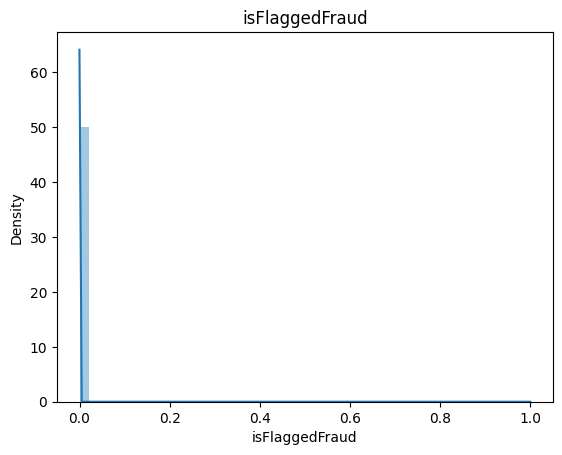

In [ ]:
for att in num_att:
  sns.distplot(data[att])
  plt.title(att)
  plt.xlabel(att)
  plt.show()

**Total amount loss due to fraud**

In [ ]:
data.groupby("isFraud")['type'].value_counts()

isFraud  type    
0        CASH_OUT    2233384
         PAYMENT     2151495
         CASH_IN     1399284
         TRANSFER     528812
         DEBIT         41432
1        CASH_OUT       4116
         TRANSFER       4097
Name: count, dtype: int64

In [ ]:
data.groupby("isFraud")['amount'].sum()

isFraud
0    1.132337e+12
1    1.205642e+10
Name: amount, dtype: float64

**Checking the correaltion of the data**

In [ ]:
data.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [1]:
sns.heatmap(data.corr(numeric_only=True),annot=True,mask=np.triu(data.corr()))
plt.title("Correlation_matrix")
plt.show()

NameError: name 'sns' is not defined

***Feature Selection droping the time,names and co_related data ***

In [ ]:
df=data.drop(columns=['step','oldbalanceOrg','oldbalanceDest','isFlaggedFraud','nameOrig','nameDest'])
df.head()

,type,amount,newbalanceOrig,newbalanceDest,isFraud
0,PAYMENT,9839.64,160296.36,0.0,0
1,PAYMENT,1864.28,19384.72,0.0,0
2,TRANSFER,181.00,0.00,0.0,1
3,CASH_OUT,181.00,0.00,0.0,1
4,PAYMENT,11668.14,29885.86,0.0,0


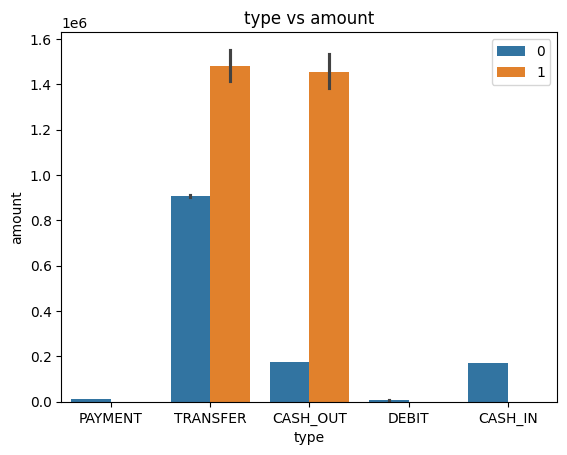

In [ ]:
sns.barplot(data=df,x="type",y="amount",hue="isFraud")
plt.title("type vs amount")
# plt.xlabel("type")
# plt.ylabel("amount")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline


In [ ]:
df.isna().sum()

type              0
amount            0
newbalanceOrig    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
train=df.drop(columns=['isFraud'])
test=df['isFraud']
train.head()

,type,amount,newbalanceOrig,newbalanceDest
0,PAYMENT,9839.64,160296.36,0.0
1,PAYMENT,1864.28,19384.72,0.0
2,TRANSFER,181.00,0.00,0.0
3,CASH_OUT,181.00,0.00,0.0
4,PAYMENT,11668.14,29885.86,0.0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.25,random_state=66)
x_train.shape,x_test.shape

((4771965, 4), (1590655, 4))

In [ ]:
x_train['type']=LabelEncoder().fit_transform(x_train['type'])
x_test['type']=LabelEncoder().fit_transform(x_test['type'])
trans1=ColumnTransformer([("scale",StandardScaler(),slice(0,4))],remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# LR=LogisticRegression()
# DT=DecisionTreeClassifier()
# RF=RandomForestClassifier()
SVM=SVC()
# KNN=KNeighborsClassifier()
# NB=GaussianNB()

In [ ]:
# lr_pipe=make_pipeline(trans1,LR)
# dt_pipe=make_pipeline(trans1,DT)
# rf_pipe=make_pipeline(trans1,RF)
svm_pipe=make_pipeline(trans1,SVM)
# knn_pipe=make_pipeline(trans1,KNN)
# nb_pipe=make_pipeline(trans1,NB)


In [ ]:
svm_pipe.fit(x_train,y_train)

In [ ]:
dt_pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(0, 4, None))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
# svm_pipe.fit(x_train,y_train)

In [ ]:
# nb_pipe.fit(x_train,y_train)

In [ ]:
# lr_pred=lr_pipe.predict(x_test)
# dt_pred=dt_pipe.predict(x_test)
# rf_pred=rf_pipe.predict(x_test)
svm_pred=svm_pipe.predict(x_test)
# knn_pred=knn_pipe.predict(x_test)
# nb_pred=nb_pipe.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
lr_acc=accuracy_score(y_test,lr_pred)
dt_acc=accuracy_score(y_test,dt_pred)
lr_acc,dt_acc

(0.9987740899189328, 0.9989161697539692)

In [ ]:
confusion_matrix(y_test,lr_pred)

array([[1588565,     118],
       [   1832,     140]])

In [ ]:
classification_report(y_test,lr_pred)